In [1]:
import numpy as np
import matplotlib.pyplot as plt

def multibody_solver_1d(mass, force, initial_pos, initial_speed, dt=0.1,time=100):
    position = []
    velocity = []
    for i in range(len(mass)):
        position.append([initial_pos[i]])
        velocity.append([initial_speed[i]])
    for i in range(int(time / dt) - 1):
        pos = []
        vel = []
        for j in range(len(mass)):
            pos.append(position[j][i])
            vel.append(velocity[j][i])
        for k in range(len(mass)):
            a = force[k](pos, vel, mass, i * dt) / mass[k]
            velocity[k].append(vel[k] + a * dt)
            position[j].append(pos[j] + velocity[j][i + 1] * dt)   
                
    return position, velocity

In [10]:
def multibody_solver_2d(mass, force, initial_pos, initial_speed, dt=0.1,time=100):
    position = []
    velocity = []
    for i in range(len(mass)):
        position.append([initial_pos[i]])
        velocity.append([initial_speed[i]])
    for i in range(int(time/dt) - 1):
        pos = []
        vel = []
        for j in range(len(mass)):
            pos.append(position[j][i])
            vel.append(velocity[j][i])
        for j in range(len(mass)):
            ax,ay = force[j](pos,vel,mass)
            ax = ax/mass[j]
            ay = ay/mass[j]
            velocity[j].append([vel[j][0] + ax*dt,vel[j][1] + ay*dt])
            position[j].append([pos[j][0] + velocity[j][i+1][0]*dt,pos[j][1] + velocity[j][i+1][1]*dt])
    return position, velocity

In [3]:
def gravity(mass, initial_position, initial_velocity, dt=0.01, total_time=100):
    def force1(position, velocty, mass):
        f = -mass[0] * mass[1] / ((position[0][0] - position[1][0]) * (position[0][0] - position[1][0]) + (
                    position[0][1] - position[1][1]) * (position[0][1] - position[1][1]))
        theta = np.arctan2(position[0][1] - position[1][1], position[0][0] - position[1][0])
        return f * np.cos(theta), f * np.sin(theta)

    def force2(position, velocity, mass):
        f = -mass[0] * mass[1] / ((position[0][0] - position[1][0]) * (position[0][0] - position[1][0]) + (
                    position[0][1] - position[1][1]) * (position[0][1] - position[1][1]))
        theta = np.arctan2(position[1][1] - position[0][1], position[1][0] - position[0][0])
        return f * np.cos(theta), f * np.sin(theta)

    force = [force1, force2]
    position, velocity = coupled_equation_solver_2D(force, mass, initial_position, initial_velocity, dt, total_time)
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    for i in range(len(position[0])):
        x1.append(position[0][i][0])
        x2.append(position[1][i][0])
        y1.append(position[0][i][1])
        y2.append(position[1][i][1])
    coordinates = [[x1, y1], [x2, y2]]
    return coordinates

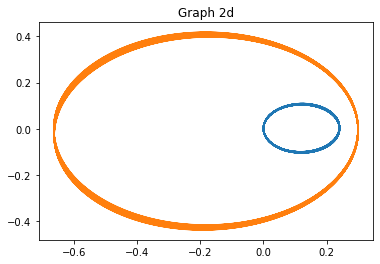

IndexError: list index out of range

In [12]:
import numpy as np
import matplotlib.pyplot as plt
##Implementation of 2D equation solver

def force1(position,velocty,mass):
    f = -mass[0]*mass[1]/((position[0][0] - position[1][0])*(position[0][0] - position[1][0]) + (position[0][1]-position[1][1])*(position[0][1]-position[1][1]))
    theta = np.arctan2(position[0][1]-position[1][1],position[0][0] - position[1][0])
    return f*np.cos(theta),f*np.sin(theta)

def force2(position,velocity,mass):
    f = -mass[0]*mass[1]/((position[0][0] - position[1][0])*(position[0][0] - position[1][0]) + (position[0][1]-position[1][1])*(position[0][1]-position[1][1]))
    theta = np.arctan2(position[1][1]-position[0][1],position[1][0] - position[0][0])
    return f*np.cos(theta),f*np.sin(theta)

force = [force1,force2]
mass = [4,1]
initial_position = [[0,0],[0.3,0]]
initial_velocity = [[0,-1],[0,4]]
dt = 0.005
total_time = 50


position,velocity = multibody_solver_2d(mass, force,initial_position,initial_velocity,dt,total_time)
time = np.arange(0,total_time,dt)

x1 = []
x2 = []
y1 = []
y2 = []
for i in range(len(position[0])):
    x1.append(position[0][i][0])
    y1.append(position[0][i][1])
    x2.append(position[1][i][0])
    y2.append(position[1][i][1])

plt.title("Graph 2d")
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()


import numpy as np
import matplotlib.pyplot as plt

##Implementation of the 1D equation solver
def force3(position,velocity,mass, time):
    return  -(position[0] - np.sin(np.pi*time)) - (position[0] - position[1])

def force4(position,velocity,mass, time):
    return -position[1] - (position[1]-position[0])

force = [force3,force4]
mass = [1,1]
initial_position = [1,0]
initial_velocity = [0,0]
dt = 0.01
total_time = 100


position,velocity = multibody_solver_1d(mass,force,initial_position,initial_velocity,dt,total_time)

time = np.arange(0,total_time,dt)

plt.title("Graph 1d")
plt.plot(time,position[0])
plt.show()